# 2.1 Exercise - 1:

**1. Read and display the image.**

• Read the image using the Pillow library and display it.

• You can also use matplotlib to display the image.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

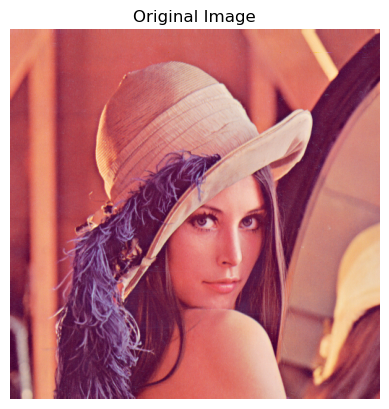

In [ ]:
image = Image.open("Lenna_(test_image).png")

# Displaying image using matplotlib
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

**2. Display only the top left corner of 100x100 pixels.**

• Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and
Array Indexing

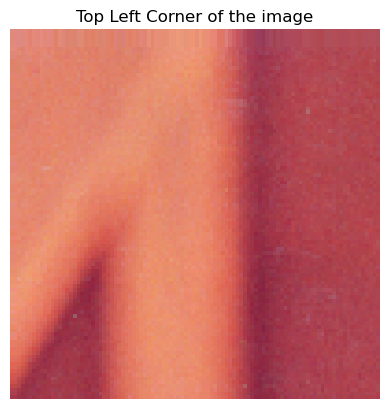

In [ ]:
# Convert the image to numpy array
image_array = np.array(image)

# Extract the top-left corner of the image (100 x 100 pixels)
top_left_corner = image_array[:100, :100]

plt.imshow(top_left_corner)
plt.title("Top Left Corner of the image")
plt.axis("off")
plt.show()

**3. Show the three color channels (R, G, B).**

• Separate the image into its three color channels (Red, Green, and Blue) and display them
individually, labeling each channel as R, G, and B.{Using NumPy.}


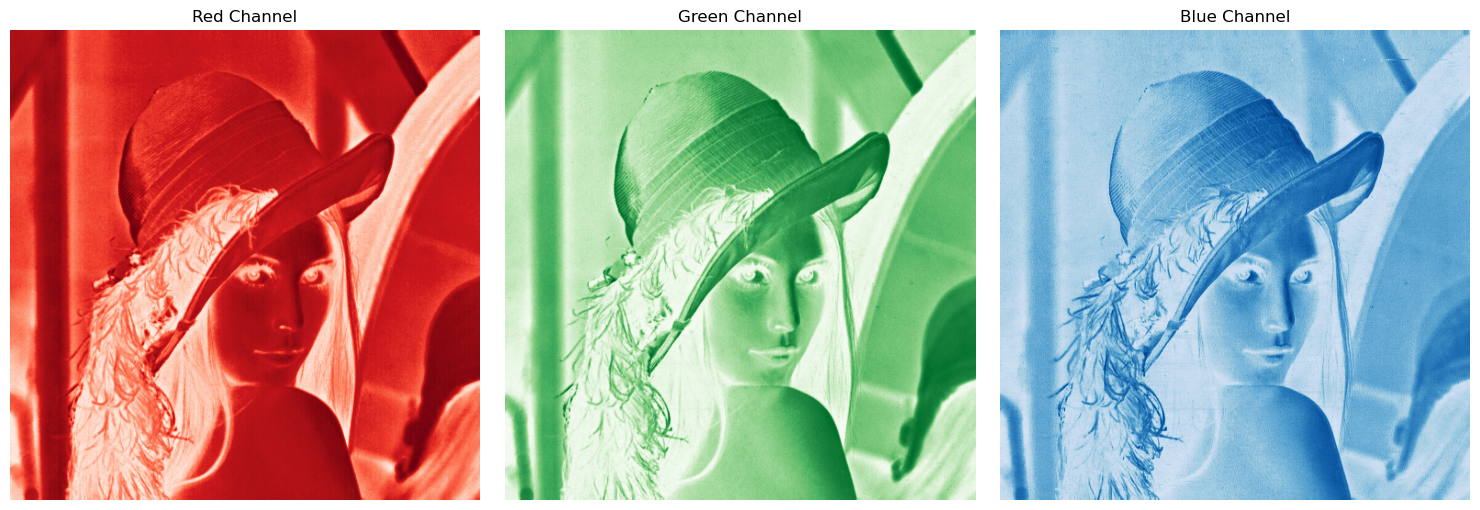

In [ ]:
red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]

# Display each channel
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(red_channel, cmap='Reds')
axes[0].set_title("Red Channel")
axes[0].axis("off")

axes[1].imshow(green_channel, cmap='Greens')
axes[1].set_title("Green Channel")
axes[1].axis("off")

axes[2].imshow(blue_channel, cmap='Blues')
axes[2].set_title("Blue Channel")
axes[2].axis("off")

plt.tight_layout()
plt.show()

**4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:**

• Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a
light gray color), and then display the modified image.

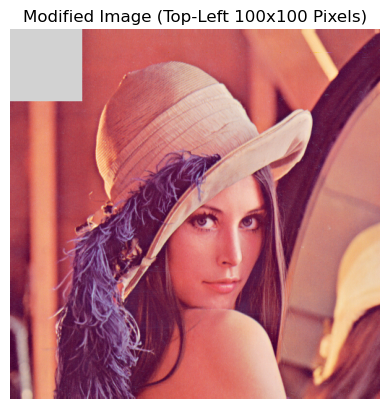

In [ ]:
# Create a copy of the original image array to avoid modifying the original
modified_image_array = image_array.copy()

# Modify the top-left 100x100 pixels to a value of 210
modified_image_array[:100, :100] = 210

# Convert the modified NumPy array back to a PIL image
modified_image = Image.fromarray(modified_image_array)

# Display the modified image
plt.imshow(modified_image)
plt.title("Modified Image (Top-Left 100x100 Pixels)")
plt.axis("off")
plt.show()

# 2.2 Exercise - 2:

**1. Load and display a grayscale image.**

• Load a grayscale image using the Pillow library.

• Display the grayscale image using matplotlib.

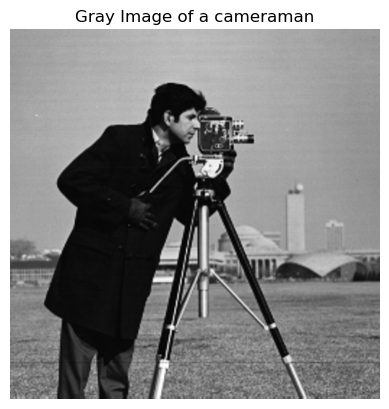

In [ ]:
gray_image = Image.open("cameraman.png").convert("L")

plt.imshow(gray_image, cmap="gray")
plt.title("Gray Image of a cameraman")
plt.axis("off")
plt.show()

**2. Extract and display the middle section of the image (150 pixels).**

• Extract a 150 pixel section from the center of the image using NumPy array slicing.

• Display this cropped image using matplotlib.

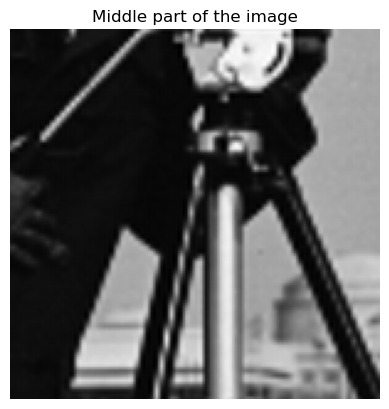

In [ ]:
# Convert grayscale image to numpyarray
grayscale_array = np.array(gray_image)

#Get the dimention of the image
height, width = grayscale_array.shape

# Calculate the starting and ending indices for the middle section
start_row = height // 2 - 75  # Center row minus half of 150
end_row = height // 2 + 75    # Center row plus half of 150
start_col = width // 2 - 75   # Center column minus half of 150
end_col = width // 2 + 75     # Center column plus half of 150

# Extract the middle section (150x150 pixels)
middle_section = grayscale_array[start_row:end_row, start_col:end_col]

#Display the image
plt.imshow(middle_section, cmap="gray")
plt.title("Middle part of the image")
plt.axis("off")
plt.show()

**3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).**

• Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values
above 100 to 255 (creating a binary image).

• Display the resulting binary image.

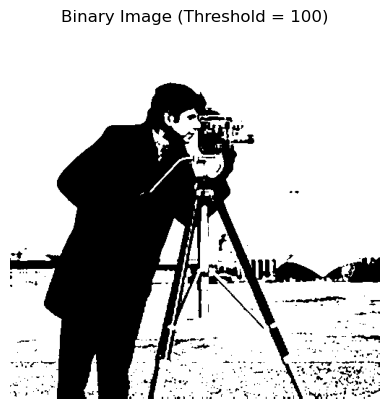

In [ ]:
# Apply a threshold to the grayscale image
threshold_value = 100
binary_image = np.where(grayscale_array < threshold_value, 0, 255)

# Display the resulting binary image
plt.imshow(binary_image, cmap="gray")
plt.title("Binary Image (Threshold = 100)")
plt.axis("off")
plt.show()

**4. Rotate the image 90 degrees clockwise and display the result.**

• Rotate the image by 90 degrees clockwise using the Pillow rotate method or by manipulating
the image array.

• Display the rotated image using matplotlib

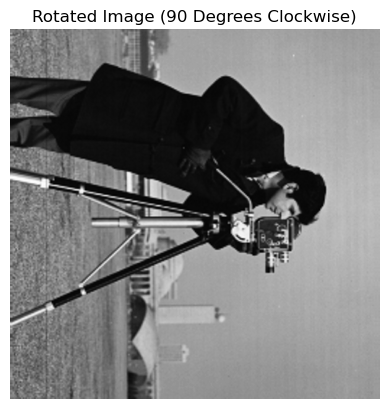

In [ ]:
# Rotate image
rotated_image = gray_image.rotate(-90)  # Negative angle for clockwise rotation

# Display the rotated image using Matplotlib
plt.imshow(rotated_image, cmap="gray")
plt.title("Rotated Image (90 Degrees Clockwise)")
plt.axis("off")
plt.show()

**5. Convert the grayscale image to an RGB image.**

• Convert the grayscale image into an RGB image where the grayscale values are replicated
across all three channels (R, G, and B).

• Display the converted RGB image using matplotlib.

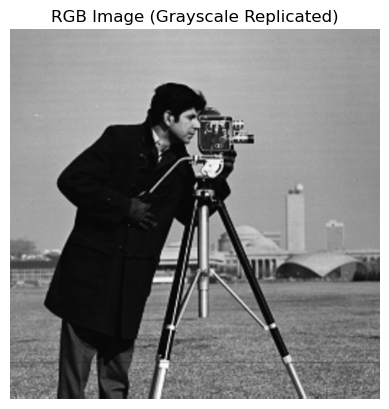

In [ ]:
# Create an RGB image by replicating the grayscale values across all three channels
rgb_image = np.stack([grayscale_array] * 3, axis=-1)

# Convert the NumPy array back to a PIL image
rgb_image_pil = Image.fromarray(rgb_image.astype(np.uint8))

# Display the converted RGB image using Matplotlib
plt.imshow(rgb_image_pil)
plt.title("RGB Image (Grayscale Replicated)")
plt.axis("off")
plt.show()

# 3 Image Compression and Decompression using PCA.

**1. Load and Prepare Data:**

• Fetch an image of you choice.{If colour convert to grayscale}

• Center the dataset - Standaridze the Data.

• Calculate the covaraince matrix of the Standaridze data

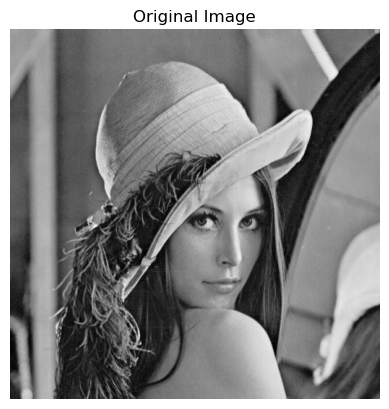

Covariance Matrix Shape: (512, 512)


In [ ]:
#Open the image
image = Image.open("Lena_gray.gif").convert("L")
image_array = np.array(image)

# Display the original image
plt.imshow(image_array, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.show()

# Center the dataset (Standardization)
mean = np.mean(image_array, axis=0)
centered_data = image_array - mean

# Calculate the covariance matrix
covariance_matrix = np.cov(centered_data, rowvar=False)

print("Covariance Matrix Shape:", covariance_matrix.shape)

**2. Eigen Decomposition and Identifying Principal Components:**

• Compute Eigen Values and Eigen Vectors.

• Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to
the highest eigenvalues.

• Identify the Principal Components with the help of cumulative Sum plot.

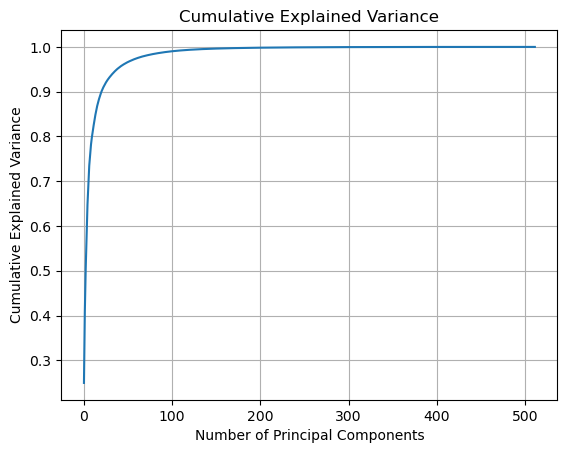

In [ ]:
# Eigen Decomposition and Identifying Principal Components
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Compute explained variance ratio
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance
plt.plot(cumulative_explained_variance)
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

# Choose top k eigenvectors based on explained variance
k_values = [10, 50, 100, 200]  # Experiment with different values of k

**3. Reconstruction and Experiment:**

• Reconstruction: Transform the original data by multiplying it with the selected eigenvectors(PCs) to obtain a lower-dimensional representation.

• Experiments: Pick Four different combination of principal components with various explained variance value and compare the result.

• Display the Results and Evaluate.

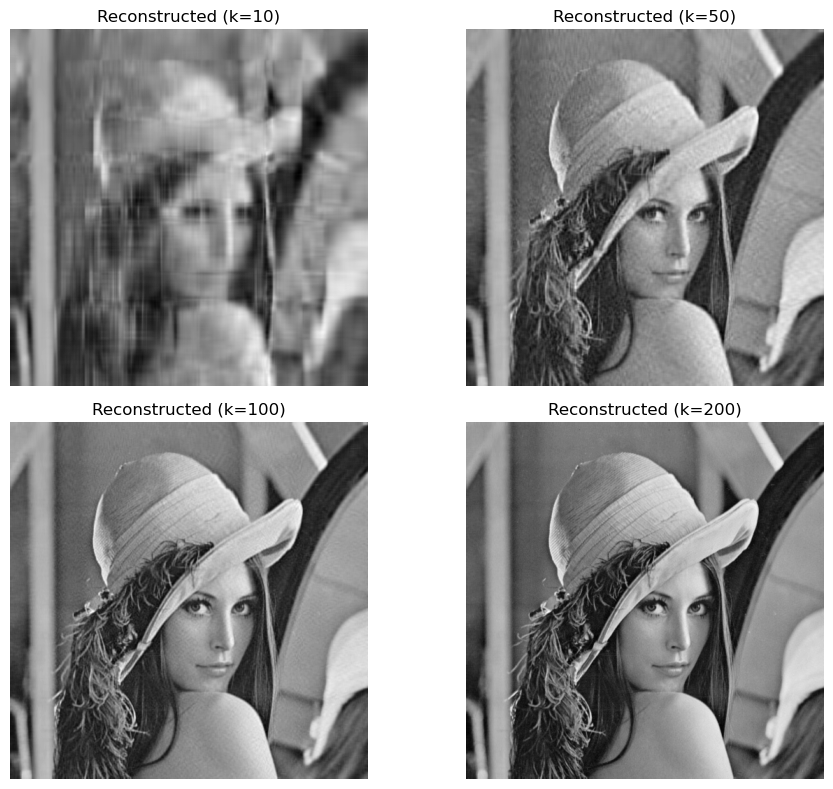

In [ ]:
# Reconstruction and Experiment
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, k in enumerate(k_values):
    # Select top k eigenvectors
    top_k_eigenvectors = sorted_eigenvectors[:, :k]

    # Project the data onto the principal components
    compressed_data = np.dot(centered_data, top_k_eigenvectors)

    # Reconstruct the data
    reconstructed_data = np.dot(compressed_data, top_k_eigenvectors.T) + mean

    # Clip values to ensure they are within valid pixel range [0, 255]
    reconstructed_image = np.clip(reconstructed_data, 0, 255).astype(np.uint8)

    # Display the reconstructed image
    axes[i].imshow(reconstructed_image, cmap="gray")
    axes[i].set_title(f"Reconstructed (k={k})")
    axes[i].axis("off")

plt.tight_layout()
plt.show()